In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(sns.__version__)
print(matplotlib.__version__)

0.9.0
3.0.2


In [8]:
sns.set() #set default Seaborn theme, Scaling and color palette
tips = sns.load_dataset("tips") # use example dataset from seaborn
print(tips[5:15])

    total_bill   tip     sex smoker  day    time  size
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2


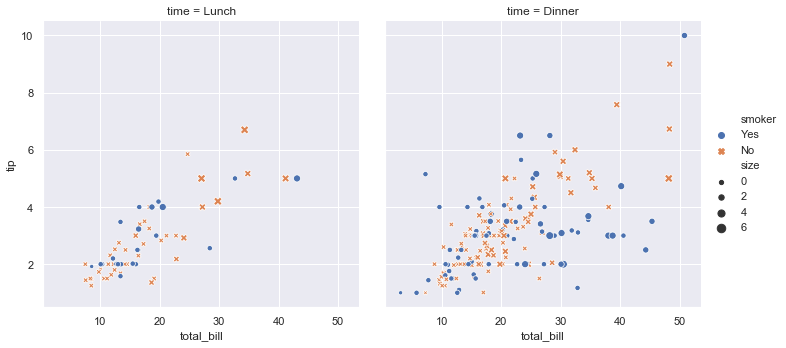

In [5]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

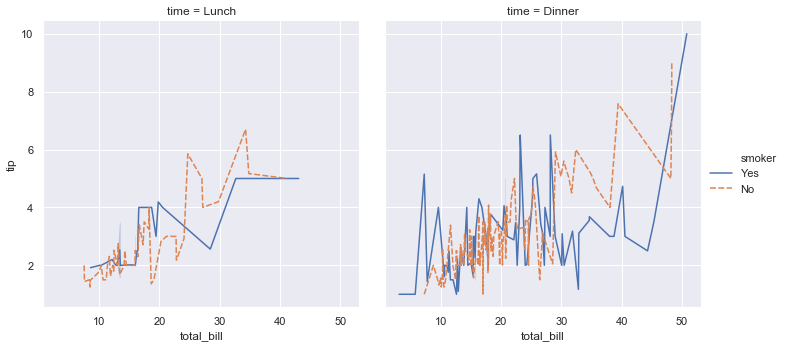

In [10]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", kind="line",
            legend="full", data=tips);